In [ ]:
import mlflow
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
db = load_diabetes()

In [ ]:
X = db.data
y = db.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

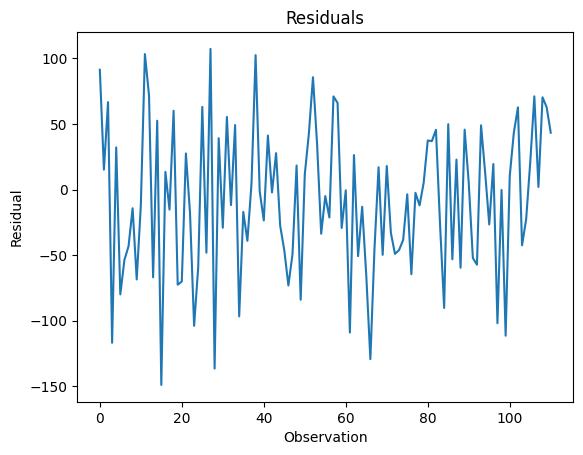

In [ ]:
# Enable autolog()
# mlflow.sklearn.autolog() requires mlflow 1.11.0 or above.
# The recommended way to get started using MLflow tracking with Python is to use the MLflow autolog() API.
# With MLflow’s autologging capabilities, a single line of code automatically logs the resulting model, the parameters used to create the model, and a model score.
mlflow.sklearn.autolog()
 
# With autolog() enabled, all model parameters, a model score, and the fitted model are automatically logged.  
with mlflow.start_run():
  # Set the model parameters. 
  n_estimators = 100
  max_depth = 6
  max_features = 3

  # Create and train model.
  rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
  rf.fit(X_train, y_train)

  # Use the model to make predictions on the test dataset.
  predictions = rf.predict(X_test)

  # Log the model parameters used for this run.
  mlflow.log_param("num_trees", n_estimators)
  mlflow.log_param("maxdepth", max_depth)
  mlflow.log_param("max_feat", max_features)

  # Define a metric to use to evaluate the model.
  mse = mean_squared_error(y_test, predictions)
    
  # Log the value of the metric from this run.
  mlflow.log_metric("mse", mse)

  # Log the model created by this run.
  # mlflow.sklearn.log_model(rf, "random-forest-model")

  # Convert the residuals to a pandas dataframe to take advantage of graphics capabilities
  df = pd.DataFrame(data = predictions - y_test)
  # Create a plot of residuals
  plt.plot(df)
  plt.xlabel("Observation")
  plt.ylabel("Residual")
  plt.title("Residuals")

  # Save the plot and log it as an artifact

  fig = plt.gcf()
  mlflow.log_figure(fig, "residuals_plot.png")

In [ ]:
! mlflow ui